In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Promethion48_TMO = 5,37e-02
Promethion48_keepup = 2,78e-02		
Promethion24_TMO = 2,69e-02
Promethion24_keepup = 1,39e-02

A100x8_speed_hac = 525244000
V100_speed_hac = 20104100
V100x2_speed_hac = 2*V100_speed_hac

A100x8_speed_sup = 99348920
V100_speed_sup = 3788265
V100x2_speed_sup = 2*V100_speed_sup

Gb_A100x8_speed_hac = 5.25E-02
Gb_V100_speed_hac = 2.01E-03
Gb_V100x2_speed_hac = 2*Gb_V100_speed_hac

Gb_A100x8_speed_sup = 9.93E-03
Gb_V100_speed_sup = 3.79E-04
Gb_V100x2_speed_sup = 2*Gb_V100_speed_sup

hac_setup_expected_speed = [A100x8_speed_hac,
                        A100x8_speed_hac+1*V100x2_speed_hac,
                        A100x8_speed_hac+2*V100x2_speed_hac,
                        A100x8_speed_hac+3*V100x2_speed_hac,
                        A100x8_speed_hac+4*V100x2_speed_hac,
                        A100x8_speed_hac*2,
                        2*A100x8_speed_hac+1*V100x2_speed_hac,
                        2*A100x8_speed_hac+2*V100x2_speed_hac,
                        2*A100x8_speed_hac+3*V100x2_speed_hac,
                        2*A100x8_speed_hac+4*V100x2_speed_hac,
                           ]

hac_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in hac_setup_expected_speed]

sup_setup_expected_speed = [A100x8_speed_sup,
                        A100x8_speed_sup+1*V100x2_speed_sup,
                        A100x8_speed_sup+2*V100x2_speed_sup,
                        A100x8_speed_sup+3*V100x2_speed_sup,
                        A100x8_speed_sup+4*V100x2_speed_sup,
                        A100x8_speed_sup*2,
                        2*A100x8_speed_sup+1*V100x2_speed_sup,
                        2*A100x8_speed_sup+2*V100x2_speed_sup,
                        2*A100x8_speed_sup+3*V100x2_speed_sup,
                        2*A100x8_speed_sup+4*V100x2_speed_sup]

sup_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in sup_setup_expected_speed]

#I need to calculate the theorical time
#calculate the samples or the Gb processed by the run and then calculate what time
#it would take using the baseline speed of each unit used in that model
size_hac_runs = 0.5*(9.7422E+11+9.7507E+11)
hac_setup_expected_time = [size_hac_runs/speed for speed in hac_setup_expected_speed]

size_sup_runs = 0.5*(8.7035E+11+8.7973E+11)
sup_setup_expected_time = [size_sup_runs/speed for speed in sup_setup_expected_speed]


# List of directory names
setup_names = [
    "1 DGX node",
    "1 DGX and 1 GPU node",
    "1 DGX and 2 GPU node",
    "1 DGX and 3 GPU node",
    "1 DGX and 4 GPU node",
    "2 DGX node",
    "2 DGX and 1 GPU node",
    "2 DGX and 2 GPU node",
    "2 DGX and 3 GPU node",
    "2 DGX and 4 GPU node",
]


print('HAC Expected speed')
print(hac_setup_expected_speed)
print()
print('HAC Expected time')
print(hac_setup_expected_time)
print()
df_runs_hac = pd.read_csv('runs_hac.csv')
df_runs_hac['setups'] = setup_names
print(df_runs_hac)
print("------------------------------")
print('SUP Expected speed')
print(sup_setup_expected_speed)
print()
print('SUP Expected time')
print(sup_setup_expected_time)
print()
df_runs_sup = pd.read_csv('runs_sup.csv')
df_runs_sup['setups'] = setup_names
print(df_runs_sup)



HAC Expected speed
[525244000, 565452200, 605660400, 645868600, 686076800, 1050488000, 1090696200, 1130904400, 1171112600, 1211320800]

HAC Expected time
[1855.6042524997906, 1723.6558633957034, 1609.226886882484, 1509.045338324235, 1420.606264488174, 927.8021262498953, 893.5989691721672, 861.8279316978517, 832.2385055032283, 804.613443441242]

                 setups  samples/s-sum  Gb/s-sum  total-time
0            1 DGX node   4.941100e+08  0.049411      2503.0
1  1 DGX and 1 GPU node   5.372600e+08  0.053726      2025.0
2  1 DGX and 2 GPU node   5.676400e+08  0.056764      1798.0
3  1 DGX and 3 GPU node   6.098400e+08  0.060984      1710.0
4  1 DGX and 4 GPU node   6.498900e+08  0.064989      1715.0
5            2 DGX node   9.532100e+08  0.095321      1213.0
6  2 DGX and 1 GPU node   9.911600e+08  0.099116      1092.0
7  2 DGX and 2 GPU node   1.032000e+09  0.103200      1183.0
8  2 DGX and 3 GPU node   1.077900e+09  0.107790      1183.0
9  2 DGX and 4 GPU node   1.117600e+09  0.1

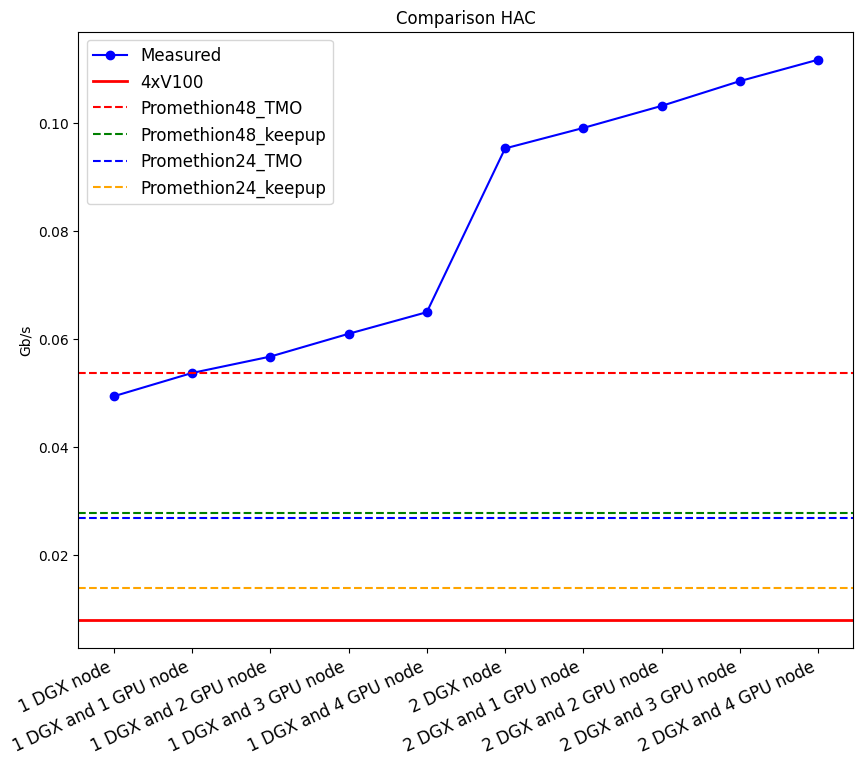

In [2]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
setup_values = df_runs_hac['setups']
gbps_values = df_runs_hac['Gb/s-sum']

# Create a bar plot
#bars = plt.bar(setup_values, gbps_values, width=0.1)
#dots = plt.plot(df_runs_hac['setups'],hac_setup_expected_speed_Gb, marker = 'o', color='red')
plt.plot(df_runs_hac['setups'],df_runs_hac['Gb/s-sum'], marker = 'o', color='blue', label='Measured')
ax.axhline(y=0.00804, linestyle='-', linewidth=2, label='4xV100', color = 'red')
# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02,
    'Promethion48_keepup': 2.78e-02,
    'Promethion24_TMO': 2.69e-02,
    'Promethion24_keepup': 1.39e-02
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=value, color=colors[i], linestyle='--', label=label)

plt.title('Comparison HAC')
plt.ylabel('Gb/s')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()

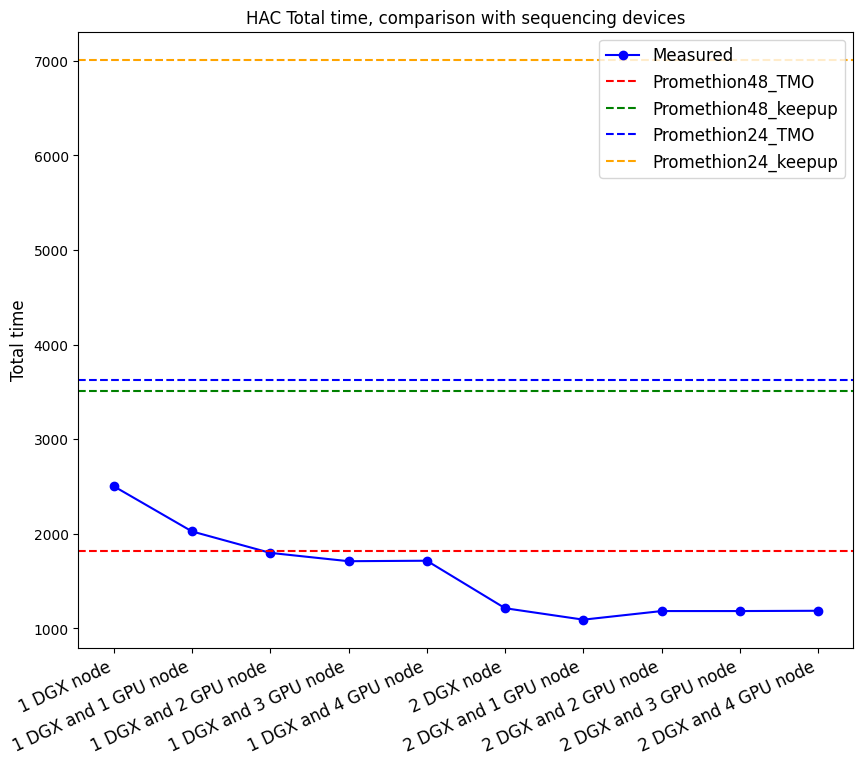

In [27]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df_runs_hac['setups'],df_runs_hac['total-time'], marker = 'o', color='blue', label='Measured')
#ax.axhline(y=size_hac_runs/(4*V100_speed_hac), linestyle='-', linewidth=2, label='4xV100', color = 'red')
# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02*10*1000*1000*1000,
    'Promethion48_keepup': 2.78e-02*10*1000*1000*1000,
    'Promethion24_TMO': 2.69e-02*10*1000*1000*1000,
    'Promethion24_keepup': 1.39e-02*10*1000*1000*1000
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=size_hac_runs/value, color=colors[i], linestyle='--', label=label)

plt.title('HAC Total time, comparison with sequencing devices')
plt.ylabel('Total time',fontsize=12)


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()

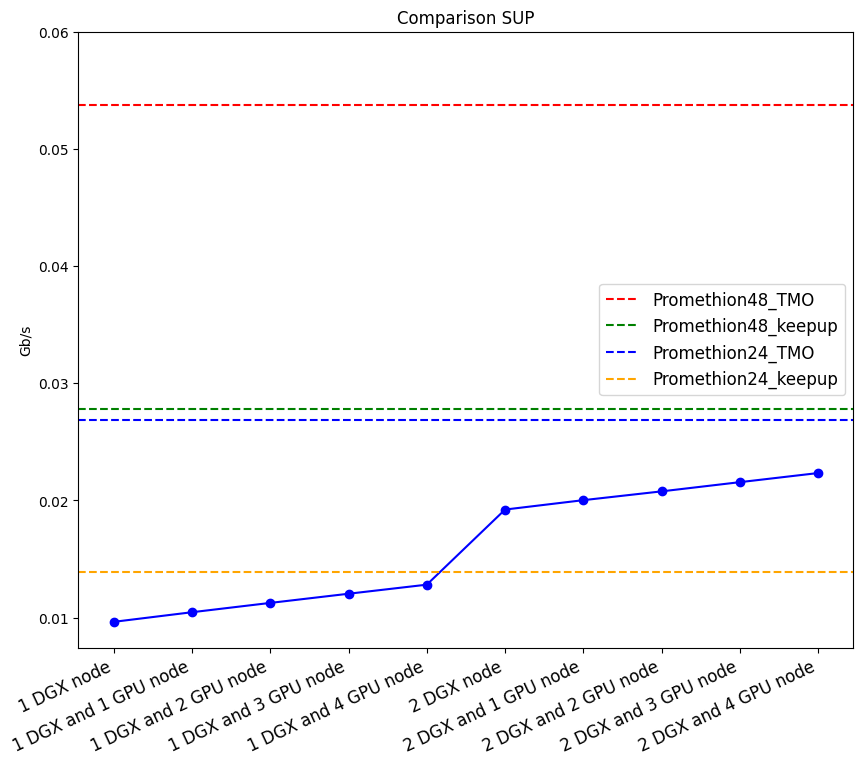

In [19]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
setup_values = df_runs_sup['setups']
gbps_values = df_runs_sup['Gb/s-sum']

# Create a bar plot
#bars = plt.bar(setup_values, gbps_values, width=0.1)
#dots = plt.plot(df_runs_sup['setups'],sup_setup_expected_speed_Gb, marker = 'o', color='red')
plt.plot(df_runs_sup['setups'],df_runs_sup['Gb/s-sum'], marker = 'o', color='blue')
0.001516
# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02,
    'Promethion48_keepup': 2.78e-02,
    'Promethion24_TMO': 2.69e-02,
    'Promethion24_keepup': 1.39e-02
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=value, color=colors[i], linestyle='--', label=label)

plt.title('Comparison SUP')
plt.ylabel('Gb/s')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')
plt.show()


Promethion48_TMO
3443.8386702091843
154.8638919363686
Promethion48_keepup
1734.612942864345
31.940711281769957
Promethion24_TMO
1675.2189986708954
27.669249405741457
Promethion24_keepup
817.3064714321725
-34.02964435911502


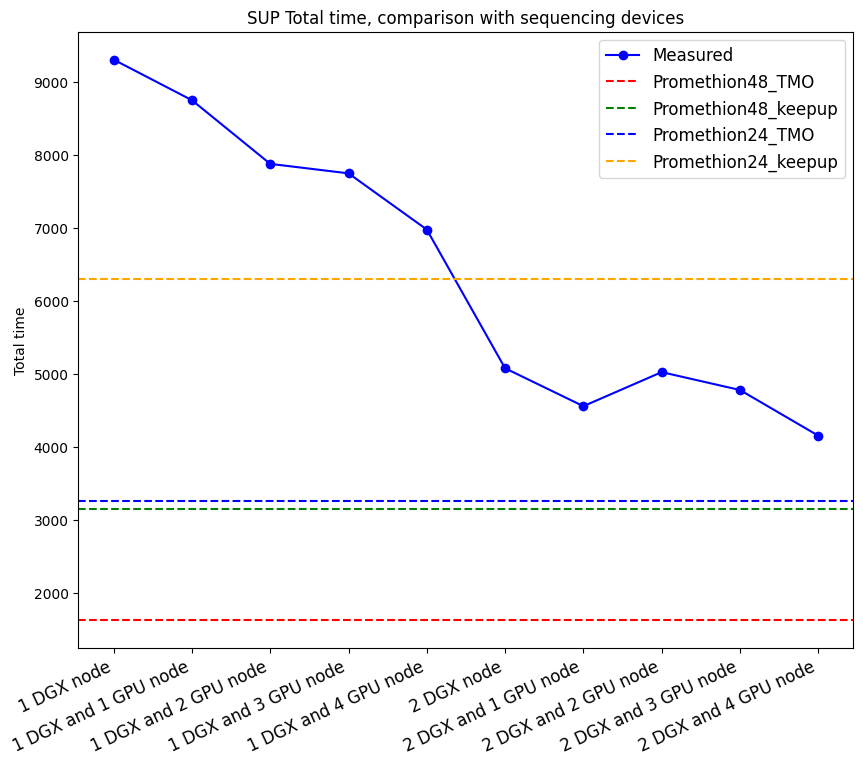

In [41]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df_runs_sup['setups'],df_runs_sup['total-time'], marker = 'o', color='blue', label='Measured')
#ax.axhline(y=size_sup_runs/(4*V100_speed_sup), linestyle='-', linewidth=2, label='4xV100', color = 'red')
# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02*10*1000*1000*1000,
    'Promethion48_keepup': 2.78e-02*10*1000*1000*1000,
    'Promethion24_TMO': 2.69e-02*10*1000*1000*1000,
    'Promethion24_keepup': 1.39e-02*10*1000*1000*1000
}

colors = ['red', 'green', 'blue', 'orange']
sequencing_times = []
for i, (label, value) in enumerate(values.items()):
    sequencing_times.append(size_sup_runs/value)
    ax.axhline(y=size_sup_runs/value, color=colors[i], linestyle='--', label=label)

plt.title('SUP Total time, comparison with sequencing devices')
plt.ylabel('Total time')

# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

for i, (label, value) in enumerate(values.items()):
    print(label)
    print(100*(size_sup_runs/(4*V100_speed_sup)-sequencing_times[i])/sequencing_times[i])
    print(100*(df_runs_sup['total-time'][9]-sequencing_times[i])/sequencing_times[i])

plt.show()


# Percentage increment Samples/s


0    188.144938
1    204.575397
2    216.143354
3    232.212077
4    247.462132
5    362.958930
6    377.409356
7    392.960224
8    410.437816
9    425.554599
Name: samples/s-sum, dtype: float64


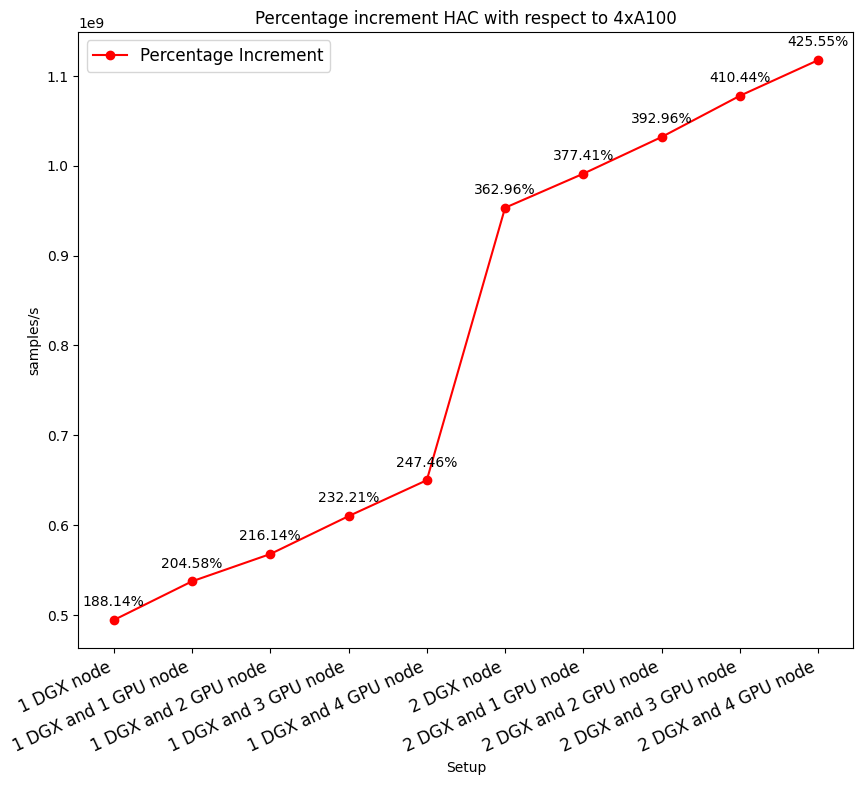

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

setup_values = df_runs_hac['setups']
samples_s_increment = ((df_runs_hac["samples/s-sum"] ) / (0.5 * A100x8_speed_hac)) * 100
print(samples_s_increment)

dots = plt.plot(df_runs_hac['setups'], df_runs_hac["samples/s-sum"], marker='o', color='red', label='Percentage Increment')

for i, txt in enumerate(samples_s_increment):
    ax.annotate(f'{samples_s_increment[i]:.2f}%', (setup_values[i], df_runs_hac["samples/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Percentage increment HAC with respect to 4xA100')
plt.ylabel('samples/s')
plt.xlabel('Setup')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

# Show the plot
plt.show()

0    193.930644
1    210.450199
2    226.454399
3    242.217027
4    257.798474
5    386.838629
6    402.983747
7    418.102180
8    433.925200
9    449.587172
Name: samples/s-sum, dtype: float64


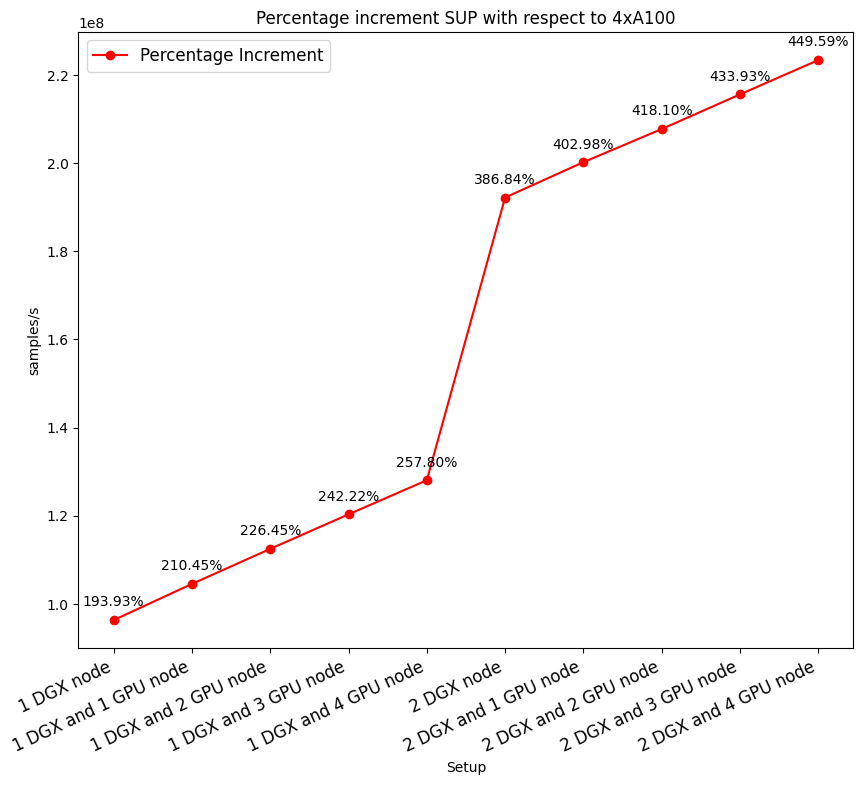

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

setup_values = df_runs_sup['setups']
samples_s_increment = ((df_runs_sup["samples/s-sum"] ) / (0.5 * A100x8_speed_sup)) * 100
print(samples_s_increment)
dots = plt.plot(df_runs_sup['setups'], df_runs_sup["samples/s-sum"], marker='o', color='red', label='Percentage Increment')

for i, txt in enumerate(samples_s_increment):
    ax.annotate(f'{samples_s_increment[i]:.2f}%', (setup_values[i], df_runs_sup["samples/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Percentage increment SUP with respect to 4xA100')
plt.ylabel('samples/s')
plt.xlabel('Setup')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

# Show the plot
plt.show()

# Percentage increment Gb/s 
## Comparison with 4xA100

0    188.232381
1    204.670476
2    216.243810
3    232.320000
4    247.577143
5    363.127619
6    377.584762
7    393.142857
8    410.628571
9    425.752381
Name: Gb/s-sum, dtype: float64
[200.0929523809524, 215.4103619047619, 230.72777142857146, 246.04518095238092, 261.36259047619046, 400.1859047619048, 415.50331428571434, 430.8207238095238, 446.13813333333337, 461.4555428571429]


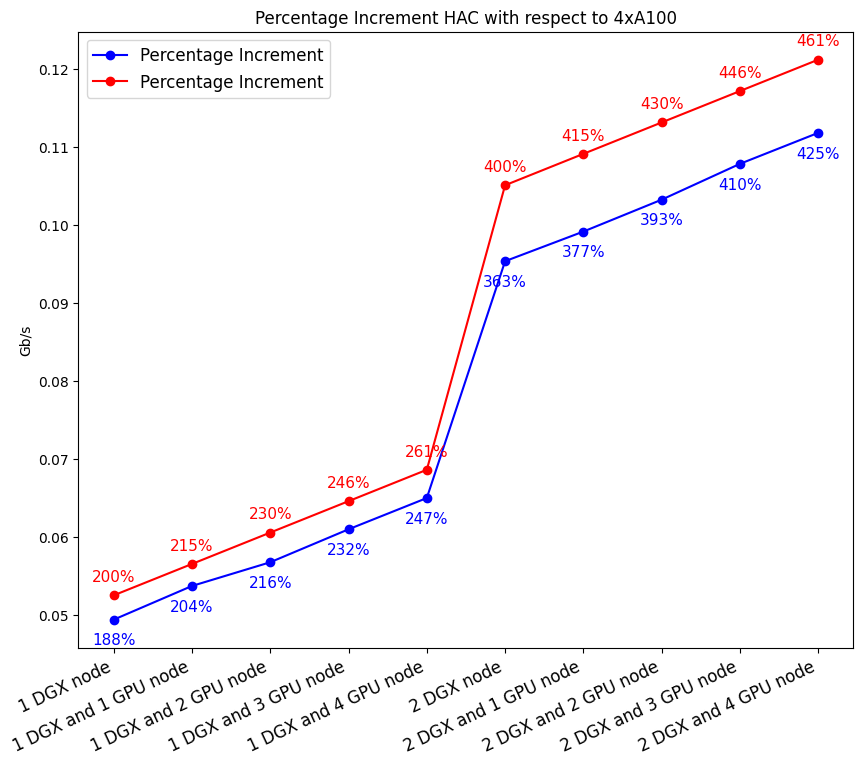

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

#MEASURED VALUES
setup_values = df_runs_hac['setups']
gbps_increment = ((df_runs_hac["Gb/s-sum"] ) / (0.5*Gb_A100x8_speed_hac)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_hac['setups'], df_runs_hac["Gb/s-sum"], marker='o', color='blue', label='Percentage Increment')


#EXPECTED VALUES
gbps_increment_expected = [((gb_speed ) / (0.5*Gb_A100x8_speed_hac)) * 100 for gb_speed in hac_setup_expected_speed_Gb]
print(gbps_increment_expected)
dots_expected = plt.plot(df_runs_hac['setups'], hac_setup_expected_speed_Gb, marker='o', color='red', label='Percentage Increment')


# Annotate Measured Values
for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{int(gbps_increment[i])}%', (setup_values[i], df_runs_hac["Gb/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(0, -18), ha='center', color='blue',fontsize=11)

# Annotate Expected Values
for i, txt in enumerate(gbps_increment_expected):
    ax.annotate(f'{int(gbps_increment_expected[i])}%', (setup_values[i], hac_setup_expected_speed_Gb[i]),
                textcoords="offset points", xytext=(0, 10), ha='center', color='red',fontsize=11)

plt.title('Percentage Increment HAC with respect to 4xA100')
plt.ylabel('Gb/s')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

# Show the plot
plt.show()

0    194.026183
1    210.553877
2    226.565962
3    242.336354
4    257.925478
5    387.029204
6    403.182276
7    418.308157
8    434.138973
9    449.808661
Name: Gb/s-sum, dtype: float64
[200.0985297079557, 215.35840886203425, 230.6182880161128, 245.87816717019138, 261.1380463242699, 400.1970594159114, 415.4569385699899, 430.7168177240685, 445.97669687814704, 461.2365760322256]


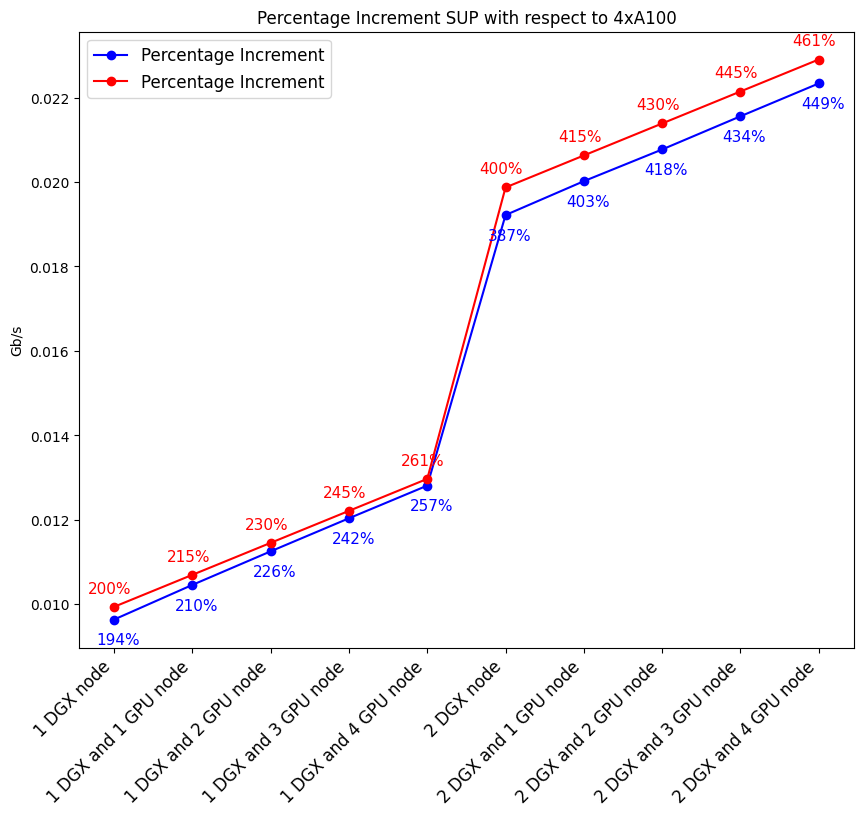

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

#MEASURED VALUES
setup_values = df_runs_sup['setups']
gbps_increment = ((df_runs_sup["Gb/s-sum"] ) / (0.5*Gb_A100x8_speed_sup)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_sup['setups'], df_runs_sup["Gb/s-sum"], marker='o', color='blue', label='Percentage Increment')


#EXPECTED VALUES
gbps_increment_expected = [((gb_speed ) / (0.5*Gb_A100x8_speed_sup)) * 100 for gb_speed in sup_setup_expected_speed_Gb]
print(gbps_increment_expected)
dots_expected = plt.plot(df_runs_sup['setups'], sup_setup_expected_speed_Gb, marker='o', color='red', label='Percentage Increment')


# Annotate Measured Values
for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{int(gbps_increment[i])}%', (setup_values[i], df_runs_sup["Gb/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='blue',fontsize=11)

# Annotate Expected Values
for i, txt in enumerate(gbps_increment_expected):
    ax.annotate(f'{int(gbps_increment_expected[i])}%', (setup_values[i], sup_setup_expected_speed_Gb[i]),
                textcoords="offset points", xytext=(-3, 10), ha='center', color='red',fontsize=11)

plt.title('Percentage Increment SUP with respect to 4xA100')
plt.ylabel('Gb/s')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

# Show the plot
plt.show()

# Percentage increment Gb/s 
## Comparison with 4xV100

0     614.564677
1     668.233831
2     706.019900
3     758.507463
4     808.320896
5    1185.584577
6    1232.786070
7    1283.582090
8    1340.671642
9    1390.049751
Name: Gb/s-sum, dtype: float64
[653.2885572139303, 703.2987562189055, 753.3089552238806, 803.3191542288556, 853.329353233831, 1306.5771144278606, 1356.5873134328358, 1406.597512437811, 1456.607711442786, 1506.6179104477612]


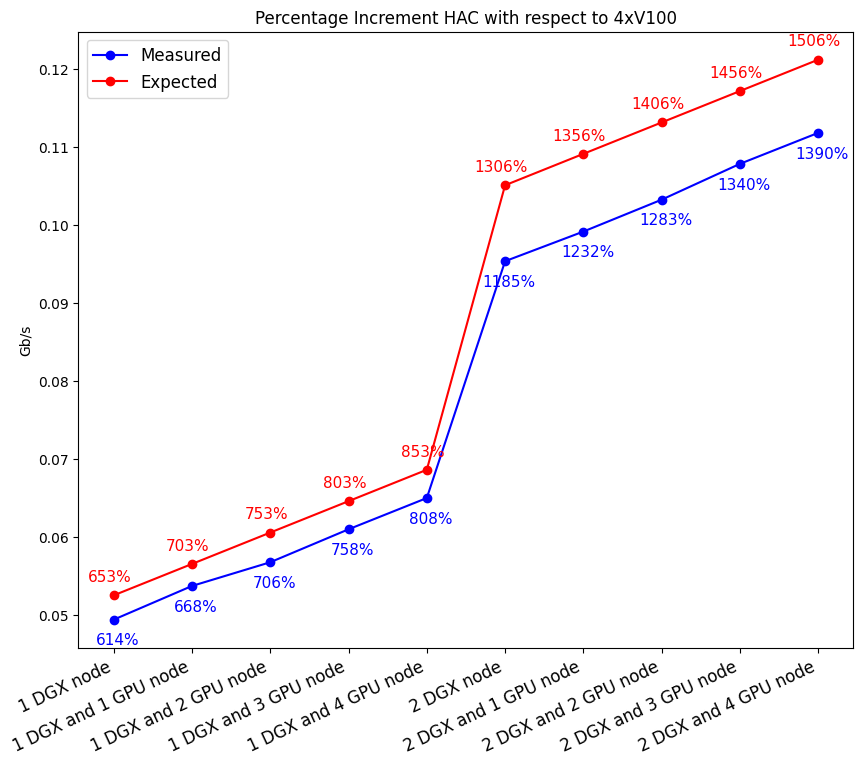

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

#MEASURED VALUES
setup_values = df_runs_hac['setups']
gbps_increment = ((df_runs_hac["Gb/s-sum"] ) / (2*Gb_V100x2_speed_hac)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_hac['setups'], df_runs_hac["Gb/s-sum"], marker='o', color='blue', label='Measured')


#EXPECTED VALUES
gbps_increment_expected = [((gb_speed ) / (2*Gb_V100x2_speed_hac)) * 100 for gb_speed in hac_setup_expected_speed_Gb]
print(gbps_increment_expected)
dots_expected = plt.plot(df_runs_hac['setups'], hac_setup_expected_speed_Gb, marker='o', color='red', label='Expected')


# Annotate Measured Values
for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{int(gbps_increment[i])}%', (setup_values[i], df_runs_hac["Gb/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='blue',fontsize=11)

# Annotate Expected Values
for i, txt in enumerate(gbps_increment_expected):
    ax.annotate(f'{int(gbps_increment_expected[i])}%', (setup_values[i], hac_setup_expected_speed_Gb[i]),
                textcoords="offset points", xytext=(-3, 10), ha='center', color='red',fontsize=11)

plt.title('Percentage Increment HAC with respect to 4xV100')
plt.ylabel('Gb/s')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

# Show the plot
plt.show()

0     635.448549
1     689.577836
2     742.018470
3     793.667546
4     844.722955
5    1267.546174
6    1320.448549
7    1369.986807
8    1421.833773
9    1473.153034
Name: Gb/s-sum, dtype: float64
[655.3358839050132, 705.3129947229551, 755.2901055408971, 805.267216358839, 855.244327176781, 1310.6717678100265, 1360.648878627968, 1410.6259894459101, 1460.6031002638522, 1510.5802110817942]


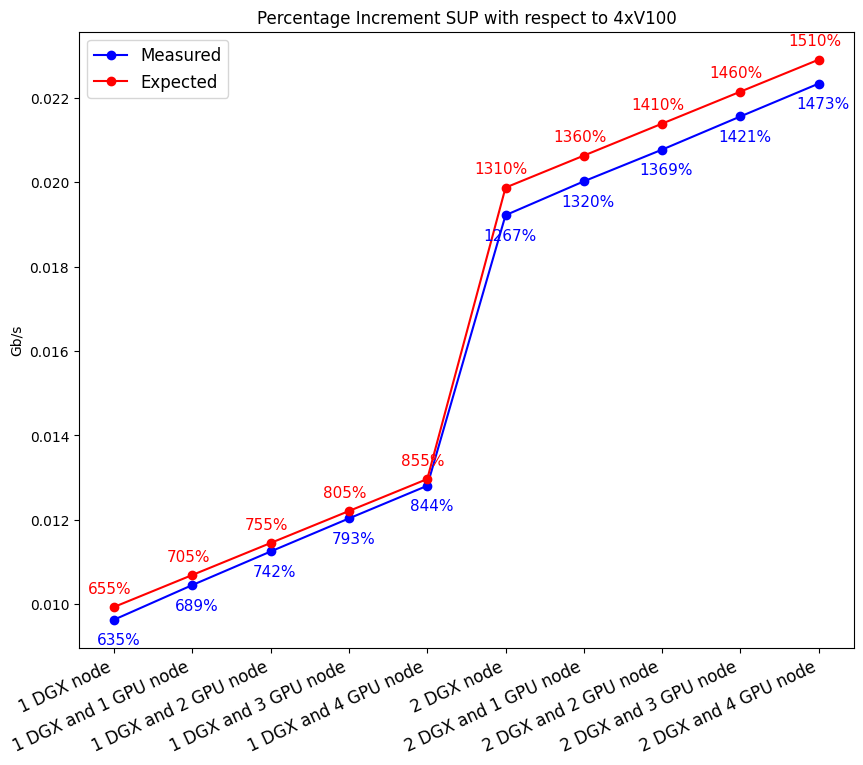

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

#MEASURED VALUES
setup_values = df_runs_sup['setups']
gbps_increment = ((df_runs_sup["Gb/s-sum"] ) / (2*Gb_V100x2_speed_sup)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_sup['setups'], df_runs_sup["Gb/s-sum"], marker='o', color='blue', label='Measured')


#EXPECTED VALUES
gbps_increment_expected = [((gb_speed ) / (2*Gb_V100x2_speed_sup)) * 100 for gb_speed in sup_setup_expected_speed_Gb]
print(gbps_increment_expected)
dots_expected = plt.plot(df_runs_sup['setups'], sup_setup_expected_speed_Gb, marker='o', color='red', label='Expected')


# Annotate Measured Values
for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{int(gbps_increment[i])}%', (setup_values[i], df_runs_sup["Gb/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='blue',fontsize=11)

# Annotate Expected Values
for i, txt in enumerate(gbps_increment_expected):
    ax.annotate(f'{int(gbps_increment_expected[i])}%', (setup_values[i], sup_setup_expected_speed_Gb[i]),
                textcoords="offset points", xytext=(-3, 10), ha='center', color='red',fontsize=11)

plt.title('Percentage Increment SUP with respect to 4xV100')
plt.ylabel('Gb/s')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

# Show the plot
plt.show()

# Total time comparisons

In order to be sure of the result, look at the speed. If I go 15 times faster, I'll do the task in 100/15% of the original time

In [10]:
expected_sup_time_4V100 = size_sup_runs/(2*V100x2_speed_sup)
expected_hac_time_4V100 = size_hac_runs/(2*V100x2_speed_hac)

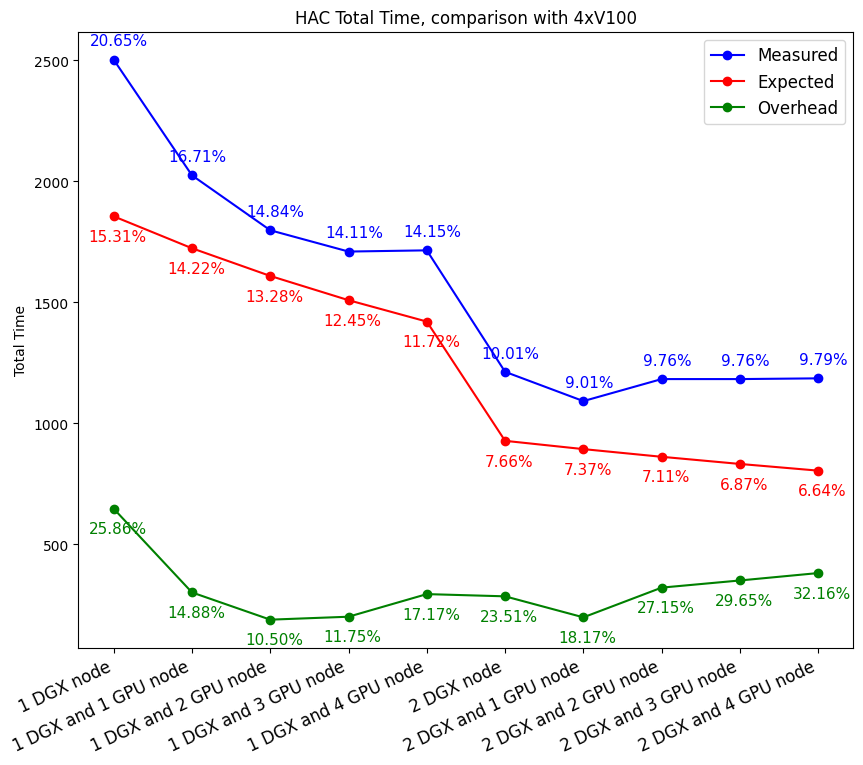

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))


time_percentage_hac = (df_runs_hac['total-time']/expected_hac_time_4V100)*100
time_percentage_hac_expected = [(time/expected_hac_time_4V100)*100 for time in hac_setup_expected_time]
hac_overhead_time_percentage = ((df_runs_hac['total-time']-hac_setup_expected_time)/df_runs_hac['total-time'])*100

plt.plot(df_runs_hac['setups'], df_runs_hac['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs_hac['setups'], hac_setup_expected_time, marker='o', color='red', label='Expected')
plt.plot(df_runs_hac['setups'], df_runs_hac['total-time']-hac_setup_expected_time, marker='o', color='green', label='Overhead')


for i, txt in enumerate(time_percentage_hac):
    ax.annotate(f'{time_percentage_hac[i]:.2f}%', (setup_values[i], df_runs_hac["total-time"].iloc[i]),
                textcoords="offset points", xytext=(4, 10), ha='center', color='blue',fontsize=11)

for i, txt in enumerate(time_percentage_hac_expected):
    ax.annotate(f'{time_percentage_hac_expected[i]:.2f}%', (setup_values[i], hac_setup_expected_time[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='red',fontsize=11)

for i, txt in enumerate(hac_overhead_time_percentage):
    ax.annotate(f'{hac_overhead_time_percentage[i]:.2f}%', (setup_values[i], (df_runs_hac['total-time']-hac_setup_expected_time)[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='green',fontsize=11)

plt.ylabel('Total Time')

plt.title('HAC Total Time, comparison with 4xV100')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()


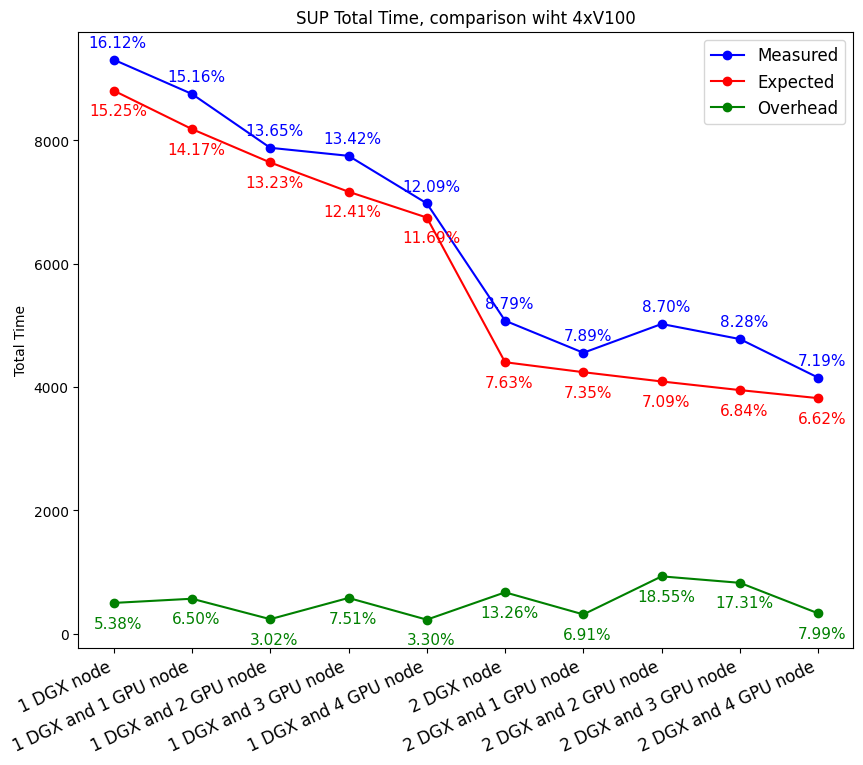

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))


time_percentage_sup = (df_runs_sup['total-time']/expected_sup_time_4V100)*100
time_percentage_sup_expected = [(time/expected_sup_time_4V100)*100 for time in sup_setup_expected_time]
sup_overhead_time_percentage = ((df_runs_sup['total-time']-sup_setup_expected_time)/df_runs_sup['total-time'])*100


plt.plot(df_runs_sup['setups'], df_runs_sup['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs_sup['setups'], sup_setup_expected_time, marker='o', color='red', label='Expected')
plt.plot(df_runs_sup['setups'], df_runs_sup['total-time']-sup_setup_expected_time, marker='o', color='green', label='Overhead')


for i, txt in enumerate(time_percentage_sup):
    ax.annotate(f'{time_percentage_sup[i]:.2f}%', (setup_values[i], df_runs_sup["total-time"].iloc[i]),
                textcoords="offset points", xytext=(3, 9), ha='center', color='blue',fontsize=11)

for i, txt in enumerate(time_percentage_sup_expected):
    ax.annotate(f'{time_percentage_sup_expected[i]:.2f}%', (setup_values[i], sup_setup_expected_time[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='red',fontsize=11)

for i, txt in enumerate(sup_overhead_time_percentage):
    ax.annotate(f'{sup_overhead_time_percentage[i]:.2f}%', (setup_values[i], (df_runs_sup['total-time']-sup_setup_expected_time)[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='green',fontsize=11)

plt.ylabel('Total Time')

plt.title('SUP Total Time, comparison wiht 4xV100')

# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()

# Communication and computation overhead
Total samples/ Actual speed = Effective time  
Measured time-effective time = overhead in communciation

In [13]:
hac_computational_effective_time = [size_hac_runs/speed for speed in df_runs_hac['samples/s-sum']]
sup_computational_effective_time = [size_sup_runs/speed for speed in df_runs_sup['samples/s-sum']]

In [14]:
hac_setup_computation_overhead = []
sup_setup_computation_overhead = []

for i,time in enumerate(hac_computational_effective_time):
    hac_setup_computation_overhead.append(hac_computational_effective_time[i]-hac_setup_expected_time[i])
    sup_setup_computation_overhead.append(sup_computational_effective_time[i]-sup_setup_expected_time[i])

I know how long it will take only with computation, so everything in excess is communication overhead

In [15]:
hac_setup_communication_overhead = []
sup_setup_communication_overhead = []

for i,time in enumerate(hac_computational_effective_time):
    hac_setup_communication_overhead.append(df_runs_hac['total-time'][i]-hac_computational_effective_time[i])
    sup_setup_communication_overhead.append(df_runs_sup['total-time'][i]-sup_computational_effective_time[i])

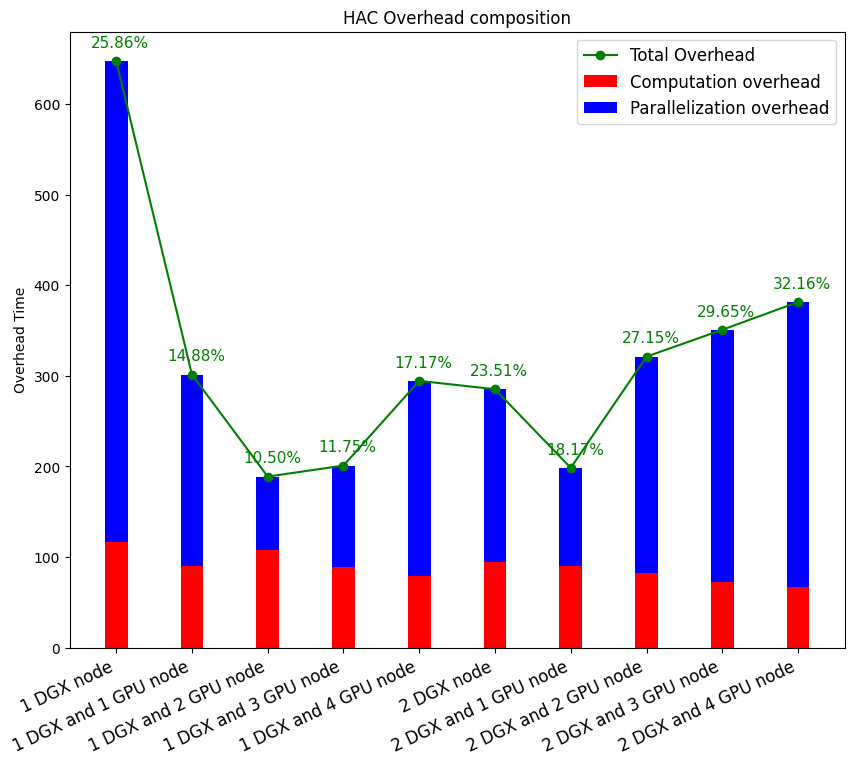

In [16]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df_runs_hac['setups'], df_runs_hac['total-time']-hac_setup_expected_time, marker='o', color='green', label='Total Overhead')


for i, txt in enumerate(hac_overhead_time_percentage):
    ax.annotate(f'{hac_overhead_time_percentage[i]:.2f}%', (setup_values[i], (df_runs_hac['total-time']-hac_setup_expected_time)[i]),
                textcoords="offset points", xytext=(3, 10), ha='center', color='green',fontsize=11)

# Plot the column chart with two values
bar_width = 0.3
bar_positions = np.arange(len(df_runs_hac['setups']))
plt.bar(bar_positions, hac_setup_computation_overhead, width=bar_width, label='Computation overhead', color='red')
plt.bar(bar_positions, hac_setup_communication_overhead, width=bar_width, bottom=hac_setup_computation_overhead, label='Parallelization overhead', color='blue')


plt.ylabel('Overhead Time')
plt.title('HAC Overhead composition')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()


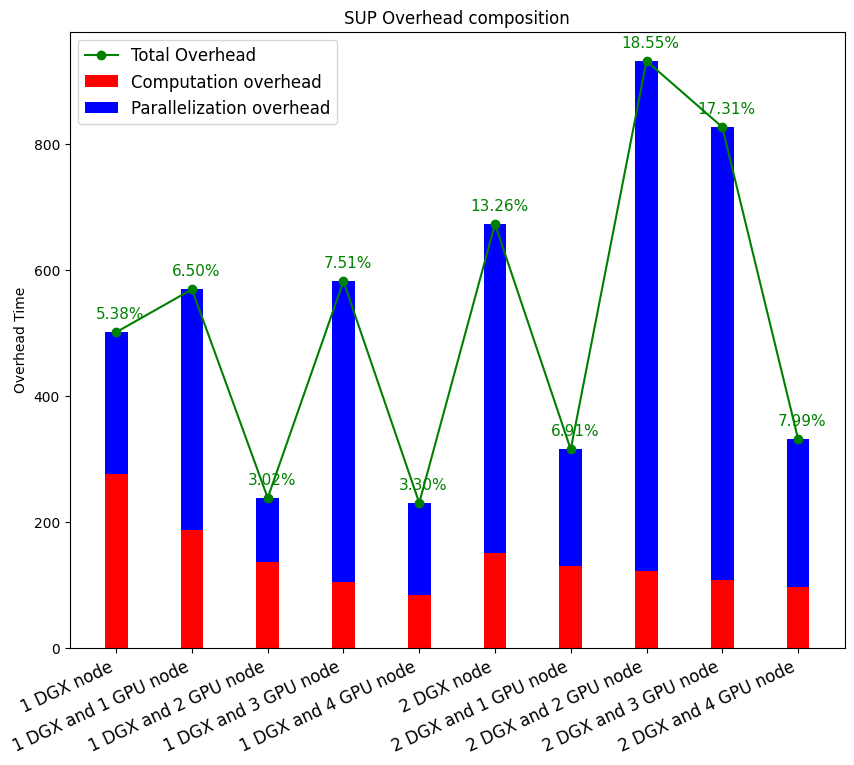

In [17]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df_runs_sup['setups'], df_runs_sup['total-time']-sup_setup_expected_time, marker='o', color='green', label='Total Overhead')


for i, txt in enumerate(sup_overhead_time_percentage):
    ax.annotate(f'{sup_overhead_time_percentage[i]:.2f}%', (setup_values[i], (df_runs_sup['total-time']-sup_setup_expected_time)[i]),
                textcoords="offset points", xytext=(3, 10), ha='center', color='green',fontsize=11)

# Plot the column chart with two values
bar_width = 0.3
bar_positions = np.arange(len(df_runs_sup['setups']))
plt.bar(bar_positions, sup_setup_computation_overhead, width=bar_width, label='Computation overhead', color='red')
plt.bar(bar_positions, sup_setup_communication_overhead, width=bar_width, bottom=sup_setup_computation_overhead, label='Parallelization overhead', color='blue')


plt.ylabel('Overhead Time')
plt.title('SUP Overhead composition')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()

The computational overhead in terms of speed is nearly divided in two values. One for 1 DGX and one for 2 DGX. I don't see that here but if use the
formulas we can see that the computational overhead trasnlates to a time overhead like this:
$$
Compute\_Overhead\_Time = No\_comm\_time - Expected\_Time =  \frac{Total\_samples}{No\_Comm\_Speed}-\frac{Total\_samples}{Expected\_Speed}
$$

$$
Compute\_Overhead\_Time =  \frac{Total\_Samples}{Expected\_speed}\times\frac{Expected\_Speed-No\_Comm\_Speed}{No\_Comm\_Speed}
$$

$$
Compute\_Overhead\_Time = Expected\_time\times\frac{-Speed\_Overhead}{No\_Comm\_Speed}
$$
So we need to see the 2 step plot for
$$
Speed\_Overhead = -\frac{Compute\_Overhead\_Time*No\_Comm\_Speed}{Expected\_time}
$$

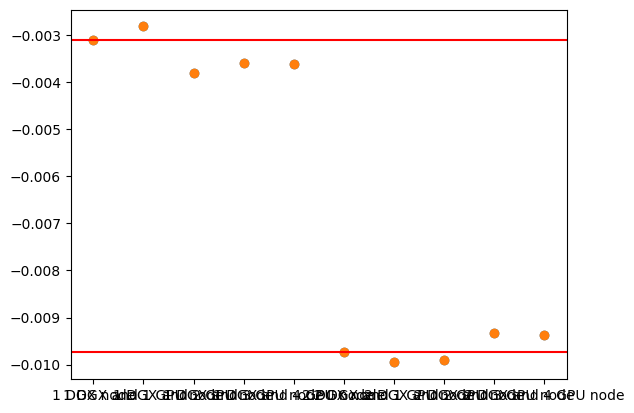

In [18]:
delta_speed_hac = -(hac_setup_computation_overhead*df_runs_hac['Gb/s-sum'])/(hac_setup_expected_time)

plt.scatter(df_runs_hac['setups'], delta_speed_hac)
plt.axhline(y = delta_speed_hac[0], color = 'r', linestyle = '-') 
plt.axhline(y = delta_speed_hac[5], color = 'r', linestyle = '-') 
plt.scatter(df_runs_hac['setups'], df_runs_hac['Gb/s-sum']-hac_setup_expected_speed_Gb)


In [19]:
gpu_differences = []
for i in range(1,5):
    gpu_differences.append(delta_speed_hac[i]-delta_speed_hac[0])
for i in range(6,10):
    gpu_differences.append(delta_speed_hac[i]-delta_speed_hac[0])

print(gpu_differences)

[0.00029417999999999285, -0.0006886399999999995, -0.0004894600000000032, -0.0005052800000000016, -0.006840220000000002, -0.006777040000000016, -0.006207859999999991, -0.00625868]


In [20]:
percentage_V100_gpu_diff = [(delta*100)/(V100_speed_hac) for delta in gpu_differences]
print(percentage_V100_gpu_diff)


[1.4632836088160765e-09, -3.425370944235253e-09, -2.4346277624962233e-09, -2.513318178878943e-09, -3.402400505369553e-08, -3.370974079914056e-08, -3.087857700668019e-08, -3.113136126461767e-08]


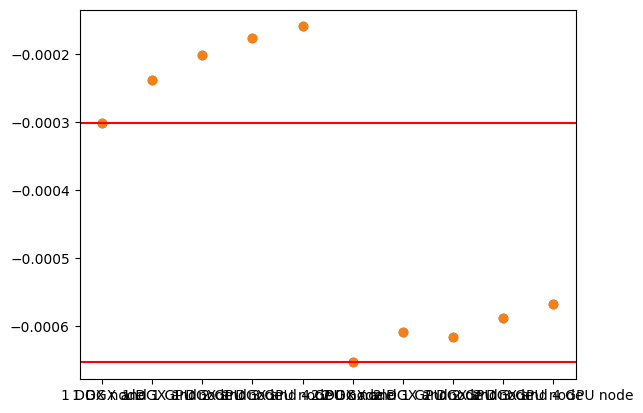

In [21]:
delta_speed_sup = -(sup_setup_computation_overhead*df_runs_sup['Gb/s-sum'])/(sup_setup_expected_time)
plt.scatter(df_runs_sup['setups'], delta_speed_sup)
plt.axhline(y = delta_speed_sup[0], color = 'r', linestyle = '-') 
plt.axhline(y = delta_speed_sup[5], color = 'r', linestyle = '-') 
plt.scatter(df_runs_sup['setups'], df_runs_sup['Gb/s-sum']-sup_setup_expected_speed_Gb)

In [22]:
gpu_differences = []
for i in range(1,5):
    gpu_differences.append(delta_speed_sup[i]-delta_speed_sup[0])
for i in range(6,10):
    gpu_differences.append(delta_speed_sup[i]-delta_speed_sup[0])

print(gpu_differences)

[6.294700000000116e-05, 0.00010029400000000142, 0.00012564100000000072, 0.00014198800000000074, -0.00030794499999999724, -0.00031459799999999824, -0.0002862509999999996, -0.0002659039999999985]


In [23]:
percentage_V100_gpu_diff = [(delta*100)/(V100_speed_sup) for delta in gpu_differences]
print(percentage_V100_gpu_diff)


[1.6616313800645192e-09, 2.6474916617502057e-09, 3.3165842410707994e-09, 3.748101043617612e-09, -8.128919175400804e-09, -8.304540469053729e-09, -7.556255964141885e-09, -7.019149927473355e-09]


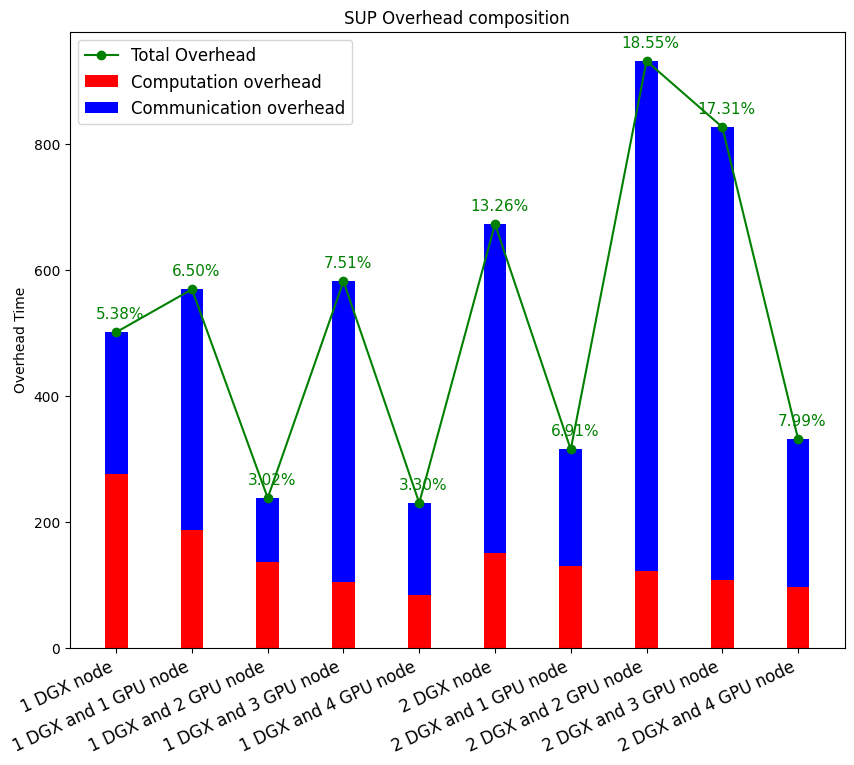

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df_runs_sup['setups'], df_runs_sup['total-time']-sup_setup_expected_time, marker='o', color='green', label='Total Overhead')


for i, txt in enumerate(sup_overhead_time_percentage):
    ax.annotate(f'{sup_overhead_time_percentage[i]:.2f}%', (setup_values[i], (df_runs_sup['total-time']-sup_setup_expected_time)[i]),
                textcoords="offset points", xytext=(3, 10), ha='center', color='green',fontsize=11)

# Plot the column chart with two values
bar_width = 0.3
bar_positions = np.arange(len(df_runs_sup['setups']))
plt.bar(bar_positions, sup_setup_computation_overhead, width=bar_width, label='Computation overhead', color='red')
plt.bar(bar_positions, sup_setup_communication_overhead, width=bar_width, bottom=sup_setup_computation_overhead, label='Communication overhead', color='blue')


plt.ylabel('Overhead Time')
plt.title('SUP Overhead composition')


# Rotate x-axis labels
plt.xticks(rotation=25, ha='right',fontsize=12)
# Make legend smaller
ax.legend(fontsize='large')

plt.show()

# Scalability
We need to figure 1 processors, which will be 4 V100. Then we parametrize our computational power with this N and try to plot a scalability


In [25]:
print(hac_setup_expected_speed_Gb)
print(4*Gb_V100_speed_hac)

[0.0525244, 0.05654522, 0.06056604, 0.06458686, 0.06860768, 0.1050488, 0.10906962, 0.11309044, 0.11711126, 0.12113208]
0.00804


In [26]:
# To get how many untis of speed each expected speed is, Divide total_speed by 1 unit of speed which is 4*Gb_expected_speed_Gb
hac_expected_speed_units = [speed/(4*Gb_V100_speed_hac) for speed in hac_setup_expected_speed_Gb]
sup_expected_speed_units = [speed/(4*Gb_V100_speed_sup) for speed in sup_setup_expected_speed_Gb]

print(hac_expected_speed_units)
print()
print(sup_expected_speed_units)

[6.532885572139303, 7.032987562189055, 7.533089552238806, 8.033191542288556, 8.533293532338309, 13.065771144278607, 13.565873134328358, 14.06597512437811, 14.56607711442786, 15.066179104477612]

[6.553358839050133, 7.053129947229551, 7.552901055408971, 8.05267216358839, 8.55244327176781, 13.106717678100265, 13.606488786279682, 14.106259894459102, 14.606031002638522, 15.105802110817942]


### Speedup = T(1)/T(N)
### Amhadal law says Speedup = 1/(s+p/N)
But what are s and p for us ?

In [27]:
hac_speedup = [(expected_hac_time_4V100)/time for time in df_runs_hac['total-time']]
print(hac_speedup)

sup_speedup = [(expected_sup_time_4V100)/time for time in df_runs_sup['total-time']]
print(sup_speedup)

[4.842180589067066, 5.985174328115983, 6.740810909029403, 7.08770644118998, 7.067042574014499, 9.99173785196609, 11.098880965599694, 10.245120891322795, 10.245120891322795, 10.21920574572923]
[6.203324969508184, 6.597366861779012, 7.328268038217219, 7.451193824664734, 8.274359097456898, 11.374187934046029, 12.672098341266555, 11.494178372044523, 12.083438405765158, 13.90482835086725]


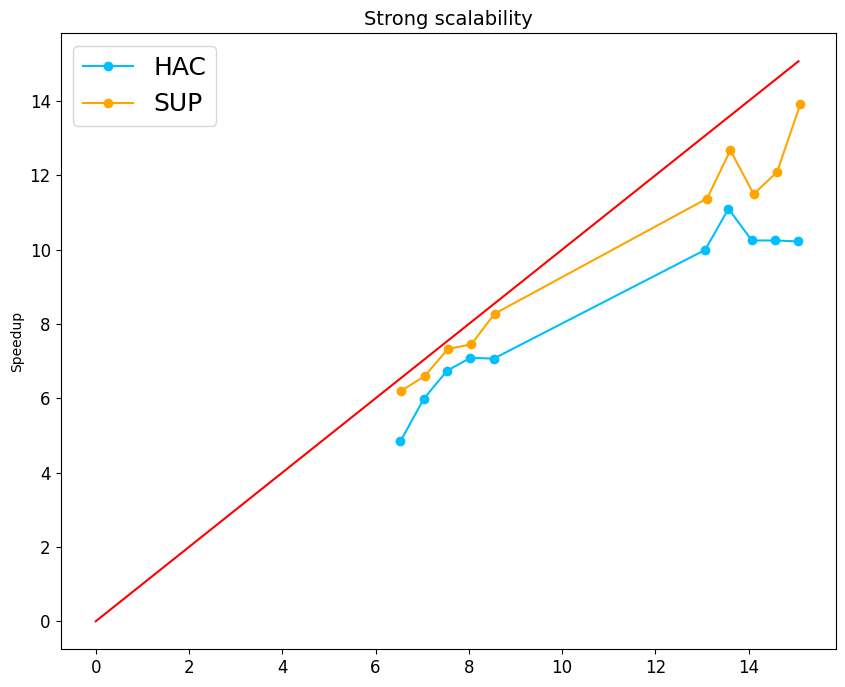

In [28]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(hac_expected_speed_units, hac_speedup, marker='o', color='deepskyblue', label='HAC')
plt.plot(sup_expected_speed_units, sup_speedup, marker='o', color='orange', label='SUP')

line = np.linspace(0,max(hac_expected_speed_units),20)
plt.plot(line, line, color='red')

plt.ylabel('Speedup')
plt.title('Strong scalability',fontsize=14)

# Rotate x-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Make legend smaller
ax.legend(fontsize=18)

plt.show()